# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, utils, optimizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import json
from zipfile import ZipFile
from PIL import Image


In [2]:
kaggle_credentails = json.load(open("kaggle.json"))

os.environ["KAGGLE_USERNAME"] = kaggle_credentails["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentails["key"]


In [3]:

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


100% 2.69G/2.70G [00:20<00:00, 220MB/s]
100% 2.70G/2.70G [00:20<00:00, 143MB/s]


In [4]:
with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
!rm -rf "new plant diseases dataset(augmented)"

## Data Preprocessing

### Training Image preprocessing

In [6]:
training_set = utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(units=1500,activation='relu'))
cnn.add(Dropout(0.4))

cnn.add(Dense(units=38,activation='softmax'))


In [9]:
cnn.compile(optimizer=optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [10]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

In [11]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 81s 33ms/step - loss: 2.8311 - accuracy: 0.2960 - val_loss: 1.5792 - val_accuracy: 0.5639
Epoch 2/10
2197/2197 [==============================] - 72s 33ms/step - loss: 1.1974 - accuracy: 0.6356 - val_loss: 0.8045 - val_accuracy: 0.7812
Epoch 3/10
2197/2197 [==============================] - 72s 33ms/step - loss: 0.7842 - accuracy: 0.7565 - val_loss: 0.6112 - val_accuracy: 0.8238
Epoch 4/10
2197/2197 [==============================] - 72s 33ms/step - loss: 0.5619 - accuracy: 0.8230 - val_loss: 0.5071 - val_accuracy: 0.8438
Epoch 5/10
2197/2197 [==============================] - 72s 33ms/step - loss: 0.4356 - accuracy: 0.8590 - val_loss: 0.3831 - val_accuracy: 0.8830
Epoch 6/10
2197/2197 [==============================] - 82s 37ms/step - loss: 0.3478 - accuracy: 0.8874 - val_loss: 0.2675 - val_accuracy: 0.9187
Epoch 7/10
2197/2197 [==============================] - 72s 33ms/step - loss: 0.2858 - accuracy: 0.9069 - val_loss: 0.2174 -

## Evaluating Model

In [12]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 45s 20ms/step - loss: 0.0951 - accuracy: 0.9724
Training accuracy: 0.9723593592643738


In [13]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 [==============================] - 11s 20ms/step - loss: 0.1549 - accuracy: 0.9510
Validation accuracy: 0.9510015845298767


### Saving Model

In [14]:
cnn.save('trained_plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
training_history.history #Return Dictionary of history


{'loss': [2.8310649394989014,
  1.1974401473999023,
  0.7842183709144592,
  0.5619216561317444,
  0.4356393814086914,
  0.3477517366409302,
  0.2857711613178253,
  0.24713903665542603,
  0.21012598276138306,
  0.1899762898683548],
 'accuracy': [0.2959669828414917,
  0.6356497406959534,
  0.7565260529518127,
  0.8229746222496033,
  0.8589515686035156,
  0.8874173164367676,
  0.9068781733512878,
  0.9183868169784546,
  0.9300661683082581,
  0.9362685680389404],
 'val_loss': [1.5791698694229126,
  0.8044934868812561,
  0.6112463474273682,
  0.5071452856063843,
  0.3831169903278351,
  0.2675135135650635,
  0.2174033522605896,
  0.21638569235801697,
  0.1965310275554657,
  0.15493232011795044],
 'val_accuracy': [0.5639085173606873,
  0.7812429070472717,
  0.8238106369972229,
  0.8438425064086914,
  0.8829956650733948,
  0.9187343716621399,
  0.9352378845214844,
  0.934156596660614,
  0.9369451403617859,
  0.9510015845298767]}

In [16]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [17]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

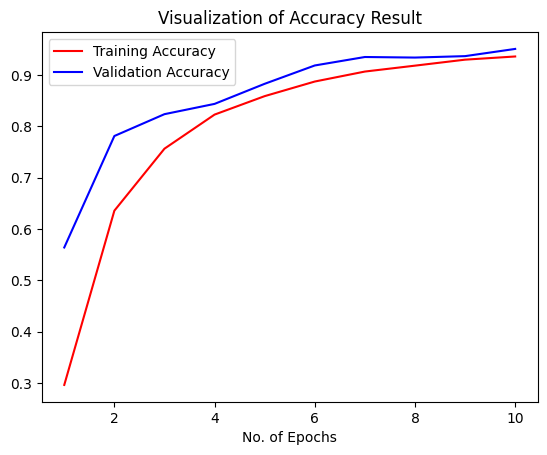

In [18]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


## Some other metrics for model evaluation

In [19]:
class_name = validation_set.class_names


In [20]:
len(class_name)

38

In [21]:
!pwd

/content


In [22]:
test_set = utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 33 files belonging to 1 classes.


In [23]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


33/33 [==============================] - 1s 2ms/step


In [24]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [25]:
Y_true


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [26]:
predicted_categories


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2, 28,  2, 28, 15,  3,  7,  8,  8,  8, 20, 20,  3, 20, 20, 22, 22,
       29, 30, 29, 29, 29, 29, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35])>

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)


In [28]:
len(Y_true)

33

In [29]:
len(predicted_categories)

33

In [30]:
# # Precision Recall Fscore
# print(classification_report(Y_true,predicted_categories,target_names=class_name))


### Confusion Matrix Visualization

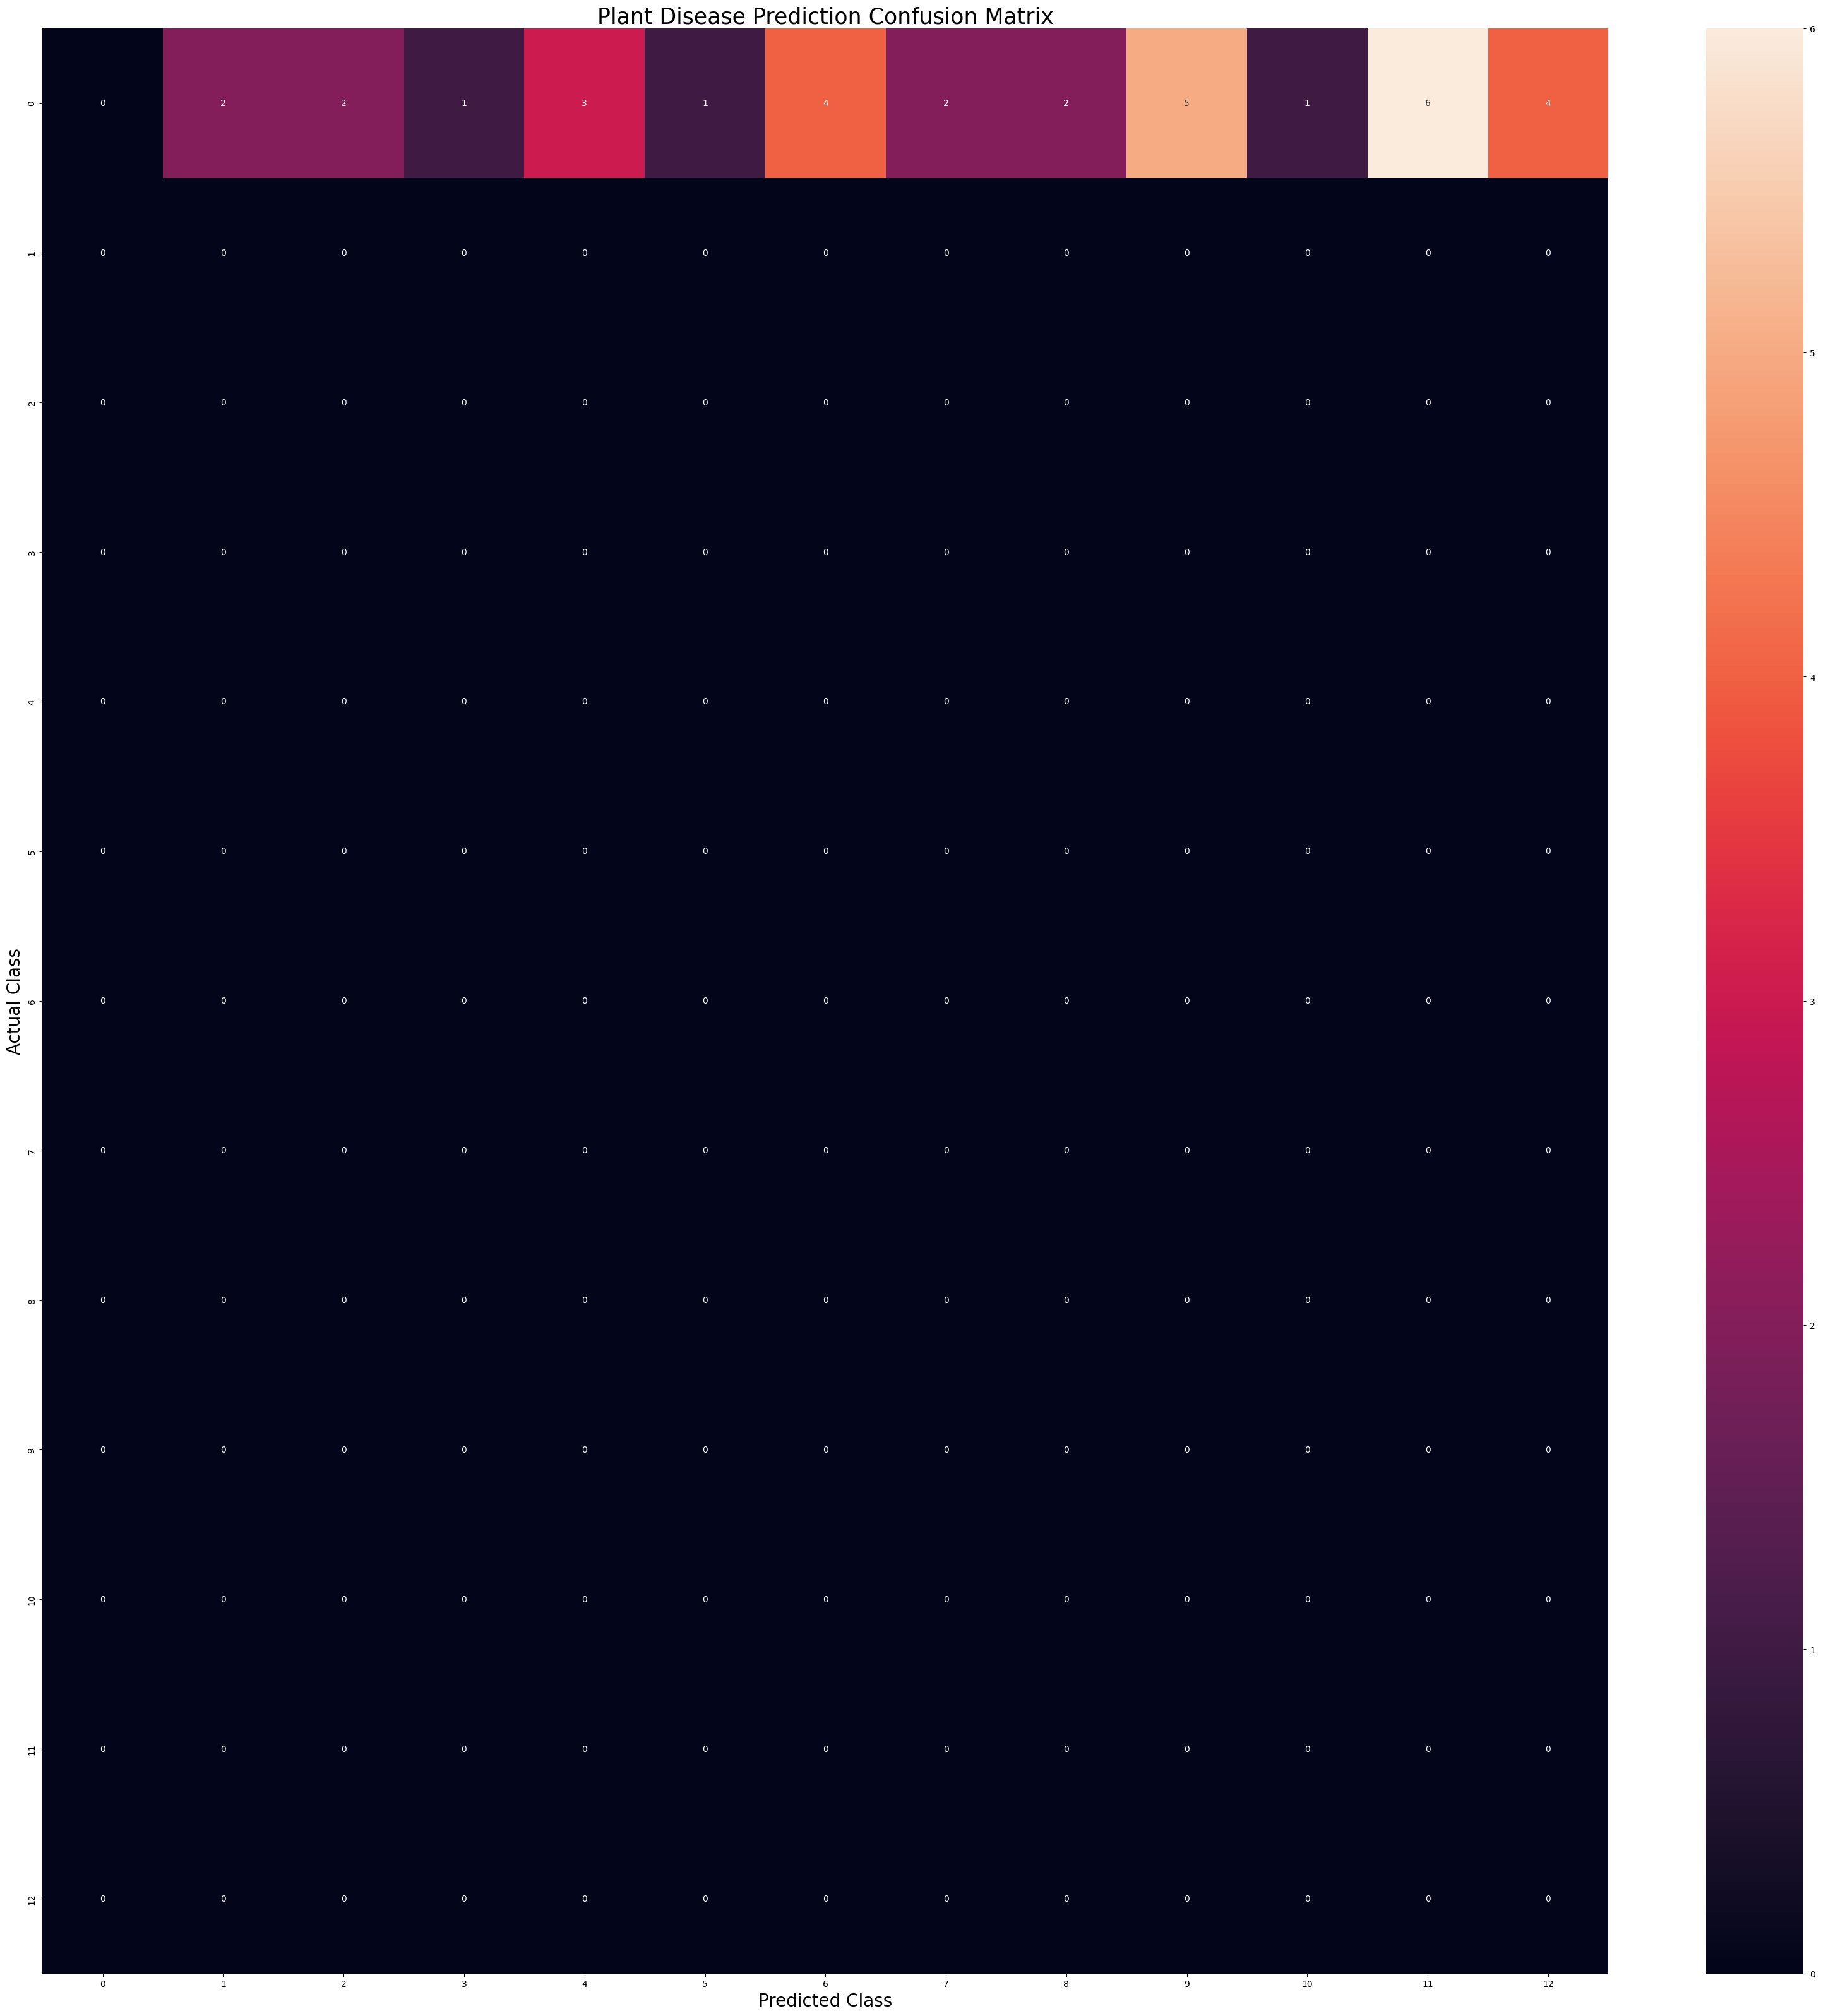

In [31]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
